# Statistics and Data Analysis

# The F-Distribution

## Author: Michelle L. Isenhour

## Last Updated:  Fall 2018

At the conclusion of this Jupyter Notebook, the student will:

* Understand the **F probability distribution** and know how to use an F-test to conduct hypothesis tests for **regression analysis**.

**Data**: None

## F Distribution

The **F distribution** arises in connection with a ratio in which there is one number of degrees of freedom associated with the numerator and another number of degrees of freedom associated with the denominator. We will use the **F distribution** to conduct hypothesis tests (aka F-tests) for **regression models**.


Here is a graph of a typical F density function:

In [1]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm                  # New
import statsmodels.formula.api as smf         # New
import os

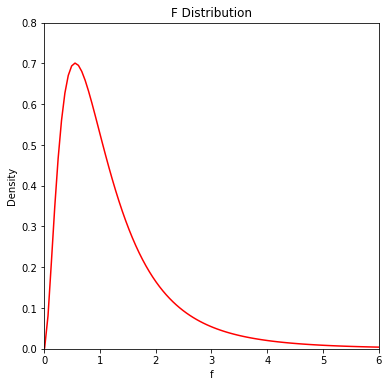

In [2]:
# plotting the F distribution
fig, ax = plt.subplots(figsize=(6,6))    # Initiate figure and axes
dfn = 6                                  # numerator degrees of freedom
dfd = 10                                 # denominator degrees of freedom
x = np.linspace(0.01,6,100)
y = stats.f.pdf(x,dfn,dfd)               # pdf of F distribution with nu1, nu2 as parameters
plt.plot(x,y,'r')
ax.set_xlim([0,6])
ax.set_ylim([0,0.8])
ax.set_xlabel('f')
ax.set_ylabel('Density')
ax.set_title('F Distribution')
plt.show()

Notice that the density curve is not symmetric and the domain is $(0,\infty)$. Therefore, a random variable that has an F distribution cannot assume a negative value.

The cutoff (or critical values) for an F distribution are found using three parameters: 1) the level of significance, $\alpha$; 2) the numerator degrees of freedom, $\nu_1$; and 3) the denominator degrees of freedom, $\nu_2$.

In _Python_, we can use the `stats.f.ppf(p,dfn,dfd)` command to find the critical value.

In [3]:
# F-critical value for a 0.05 signifance level with nu1 = 6 and nu2 = 10
alpha = 0.05                     # significance level
dfn = 6                          # numerator degrees of freedom
dfd = 10                         # denominator degrees of freedom
f95 = stats.f.ppf(0.95,dfn,dfd)  # find f-critical (always upper tail)

print('The f-critical value for a 0.05 significance level with dfn =',dfn,
      'and dfd =',dfd,'degrees of freedom is:',f95)

The f-critical value for a 0.05 significance level with dfn = 6 and dfd = 10 degrees of freedom is: 3.217174547398992


We use $F_{\alpha,~\nu_1,~\nu_2}~$ to represent the value on the horizontal axis that captures in the upper tail. So in our previous example we found $F_{0.05,~6,~10}~=3.2172$.

Graphically, it would look like this:

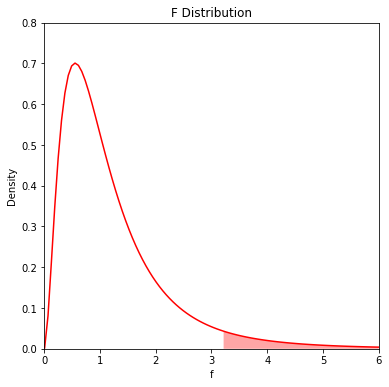

In [4]:
# plotting the F distribution
fig, ax = plt.subplots(figsize=(6,6))    # Initiate figure and axes
dfn = 6                                  # numerator degrees of freedom
dfd = 10                                 # denominator degrees of freedom
x = np.linspace(0.01,6,100)
y = stats.f.pdf(x,dfn,dfd)               # pdf of F distribution with nu1, nu2 as parameters
plt.plot(x,y,'r')
# show P(F > f95) on PDF
plt.fill_between(x=np.arange(f95,6,0.01), 
                 y1= stats.f.pdf(np.arange(f95,6,0.01),dfn,dfd) ,
                 facecolor='red',
                 alpha=0.35)
ax.set_xlim([0,6])
ax.set_ylim([0,0.8])
ax.set_xlabel('f')
ax.set_ylabel('Density')
ax.set_title('F Distribution')
plt.show()

## Simple Linear Regression

We now return to our **Processing Time Example** :

| # Disk I/O | Processor Time |
| :-: | :-: |
| 14 | 2 |
| 16 | 5 |
| 27 | 7 |
| 42 | 9 |
| 39 | 10 |
| 50 | 13 |
| 83 | 20 |


The **dependent variable** ($y$) is CPU Time and the **independent variable** ($x$) is number of disk I/O. In other words, we are trying to determine if the number of disk I/O ($x$) tells us something about CPU processor time ($y$). Thus, $x$ is also referred to as a **predictor variable** and $y$ is referred to as the **response variable**.<br>
<br>

We want to test the following hypotheses:

$$H_0: \beta_1 = 0 ~~~~~\textrm{(There is no linear relationship)}$$

$$H_a: \beta_1 \neq 0 ~~~~~\textrm{(There is a linear relationship)}$$

We begin by "manually" computing the Treatment Sum of Squares (SSTr), Treatment Mean Squares (MSTr), Error Sum of Squares (SSE), Error Mean Squares (MSE), and Total Sum of Squares (SST) using MATLAB. 

In [5]:
# Set up the DataFrame for the Processing Time Example
df = pd.DataFrame({
    'disk_io' : [14,16,27,42,39,50,83],
    'cpu_time' : [2,5,7,9,10,13,20]
    })

# Fit the model
# Option 1: Using "R" style formulas with pandas dataframes
model = smf.ols('cpu_time ~ disk_io', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               cpu_time   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     170.3
Date:                Wed, 31 Oct 2018   Prob (F-statistic):           4.72e-05
Time:                        19:33:10   Log-Likelihood:                -9.3157
No. Observations:                   7   AIC:                             22.63
Df Residuals:                       5   BIC:                             22.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0083      0.831     -0.010      0.9

/Users/misenhour/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [6]:
# Create ANOVA Table
anova_tbl = pd.DataFrame({
    'Sum of Squares' : [model.mse_model*model.df_model,
                        model.ssr,
                        model.mse_model*model.df_model+model.ssr],
    'df' : [model.df_model,
            model.df_resid,
            model.df_model+model.df_resid],
    'Mean Squares' : [model.mse_model,
                      model.mse_resid,
                      model.mse_total],
    'F' : [model.mse_model/model.mse_resid, ' ', ' '],
    }, columns=['Sum of Squares','df','Mean Squares','F'],
       index=['Model','Residual','Total'])

# Print the ANOVA Table
print(anova_tbl)

          Sum of Squares   df  Mean Squares        F
Model         199.845402  1.0    199.845402  170.258
Residual        5.868884  5.0      1.173777         
Total         205.714286  6.0     34.285714         


In [7]:
# Use the F-distribution to compute the p-value



## Summary

This _Jupyter Notebook_ introduced the student to the **F distribution**. It also demonstrated how to use the F distribution to find the critical values given a level of significance $\alpha$ and how to find p-values corresponding to an **F-test statistic**. Additionally, the script demonstrated how to use an **F-test** to conduct hypothesis tests for a **simple linear regression model**. 